# LEAD SCORING CASE STUDY

In [1]:
#importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#importing data file
Leads = pd.read_csv("Leads.csv")
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# EDA

In [4]:
#Dimensions of Dataframe
Leads.shape

(9240, 37)

In [5]:
#Analysing statistical aspects
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
## checking null values across Dataframe
Leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
## Null values in percenatage
per_cent=round(100*(Leads.isnull().sum())/len(Leads.index), 2)
print(per_cent)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Dropping all the columns in which greater than 45% of missing values are present(45 per cent of total 9000 data is almost 4050)

for col in Leads.columns:
    if Leads[col].isnull().sum() > 4000:
        Leads.drop(col, 1, inplace=True)

In [10]:
#validating the dropping
Leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
#Converting Selct to np.Nan
Leads = Leads.replace('Select', np.NaN)

In [12]:
Leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [13]:
for column in Leads:
    print(Leads[column].astype('category').value_counts())

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference         

In [14]:
# Checking columns with the unique values in category
Leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [15]:
# Checking column for skewness - Through Recommendations
round(Leads['Through Recommendations'].value_counts()*100/len(Leads),2)

No     99.92
Yes     0.08
Name: Through Recommendations, dtype: float64

In [16]:
# Checking column for skewness - Magazine 
round(Leads['Magazine'].value_counts()*100/len(Leads),2)

No    100.0
Name: Magazine, dtype: float64

In [17]:
# Checking column for skewness - Don Not Call
round(Leads['Do Not Call'].value_counts()*100/len(Leads),2)

No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64

In [18]:
# Checking column for skewness - Search
round(Leads['Search'].value_counts()*100/len(Leads),2)

No     99.85
Yes     0.15
Name: Search, dtype: float64

In [19]:
# Checking column for skewness - Newspaper Article
round(Leads['Newspaper Article'].value_counts()*100/len(Leads),2)

No     99.98
Yes     0.02
Name: Newspaper Article, dtype: float64

In [20]:
# Checking column for skewness - X Education Forums
round(Leads['X Education Forums'].value_counts()*100/len(Leads),2)

No     99.99
Yes     0.01
Name: X Education Forums, dtype: float64

In [21]:
# Checking column for skewness - Receive More Updates About Our Courses
round(Leads['Receive More Updates About Our Courses'].value_counts()*100/len(Leads),2)

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [22]:
# Checking column for skewness - Newspaper
round(Leads['Newspaper'].value_counts()*100/len(Leads),2)

No     99.99
Yes     0.01
Name: Newspaper, dtype: float64

In [23]:
# Checking column for skewness - Update me on Supply Chain Content
round(Leads['Update me on Supply Chain Content'].value_counts()*100/len(Leads),2)

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [24]:
# Checking column for skewness - Get updates on DM Content
round(Leads['Get updates on DM Content'].value_counts()*100/len(Leads),2)

No    100.0
Name: Get updates on DM Content, dtype: float64

In [25]:
# Checking column for skewness - I agree to pay the amount through cheque
round(Leads['I agree to pay the amount through cheque'].value_counts()*100/len(Leads),2)

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [26]:
# Checking column for skewness - Tags
round(Leads['Tags'].value_counts()*100/len(Leads),2)

Will revert after reading the email                  22.42
Ringing                                              13.02
Interested in other courses                           5.55
Already a student                                     5.03
Closed by Horizzon                                    3.87
switched off                                          2.60
Busy                                                  2.01
Lost to EINS                                          1.89
Not doing further education                           1.57
Interested  in full time MBA                          1.27
Graduation in progress                                1.20
invalid number                                        0.90
Diploma holder (Not Eligible)                         0.68
wrong number given                                    0.51
opp hangup                                            0.36
number not provided                                   0.29
in touch with EINS                                    0.

In [27]:
# Checking column for skewness - Tags
round(Leads['Tags'].value_counts()*100/len(Leads),2)

Will revert after reading the email                  22.42
Ringing                                              13.02
Interested in other courses                           5.55
Already a student                                     5.03
Closed by Horizzon                                    3.87
switched off                                          2.60
Busy                                                  2.01
Lost to EINS                                          1.89
Not doing further education                           1.57
Interested  in full time MBA                          1.27
Graduation in progress                                1.20
invalid number                                        0.90
Diploma holder (Not Eligible)                         0.68
wrong number given                                    0.51
opp hangup                                            0.36
number not provided                                   0.29
in touch with EINS                                    0.

In [28]:
# Checking column for skewness - Last Activity
round(Leads['Last Activity'].value_counts()*100/len(Leads),2)

Email Opened                    37.20
SMS Sent                        29.71
Olark Chat Conversation         10.53
Page Visited on Website          6.93
Converted to Lead                4.63
Email Bounced                    3.53
Email Link Clicked               2.89
Form Submitted on Website        1.26
Unreachable                      1.01
Unsubscribed                     0.66
Had a Phone Conversation         0.32
Approached upfront               0.10
View in browser link Clicked     0.06
Email Marked Spam                0.02
Email Received                   0.02
Visited Booth in Tradeshow       0.01
Resubscribed to emails           0.01
Name: Last Activity, dtype: float64

In [29]:
# Checking column for skewness - Last Activity
round(Leads['Last Activity'].value_counts()*100/len(Leads),2)

Email Opened                    37.20
SMS Sent                        29.71
Olark Chat Conversation         10.53
Page Visited on Website          6.93
Converted to Lead                4.63
Email Bounced                    3.53
Email Link Clicked               2.89
Form Submitted on Website        1.26
Unreachable                      1.01
Unsubscribed                     0.66
Had a Phone Conversation         0.32
Approached upfront               0.10
View in browser link Clicked     0.06
Email Marked Spam                0.02
Email Received                   0.02
Visited Booth in Tradeshow       0.01
Resubscribed to emails           0.01
Name: Last Activity, dtype: float64

In [30]:
# Checking column for skewness - Last Notable Activity
round(Leads['Last Notable Activity'].value_counts()*100/len(Leads),2)

Modified                        36.87
Email Opened                    30.60
SMS Sent                        23.51
Page Visited on Website          3.44
Olark Chat Conversation          1.98
Email Link Clicked               1.87
Email Bounced                    0.65
Unsubscribed                     0.51
Unreachable                      0.35
Had a Phone Conversation         0.15
Email Marked Spam                0.02
Resubscribed to emails           0.01
View in browser link Clicked     0.01
Email Received                   0.01
Approached upfront               0.01
Form Submitted on Website        0.01
Name: Last Notable Activity, dtype: float64

In [31]:
#Dropping all sales team generated columns and columns with unique value category greater than 90%
Leads.drop(['Last Activity','Last Notable Activity','Tags','Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [32]:
# Checking mode of Lead Source
print(Leads['Lead Source'].mode())

0    Google
dtype: object


In [33]:
# Replacing null values with mode
Leads['Lead Source'] = Leads['Lead Source'].replace(np.NaN, 'Google')

In [34]:
Leads['Lead Source'].isnull().sum()

0

In [35]:
print(Leads['TotalVisits'].median())

3.0


In [36]:
# Replacing null values with median in Numerical columns
Leads['TotalVisits'] = Leads['TotalVisits'].replace(np.NaN, '3.0')

In [37]:
print(Leads['Page Views Per Visit'].median())

2.0


In [38]:
# Replacing null values with median in Numerical columns
Leads['Page Views Per Visit'] = Leads['Page Views Per Visit'].replace(np.NaN, '2.0')

In [39]:
Leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Lead Profile                                     6855
City                                             3669
A free copy of Mastering The Interview              0
dtype: int64

In [40]:
Leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [41]:
Leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
City                                             3669
A free copy of Mastering The Interview              0
dtype: int64

In [42]:
# Checking mode of City
print(Leads['City'].mode())

0    Mumbai
dtype: object


In [43]:
# Replacing null values with mode
Leads['City'] = Leads['City'].replace(np.NaN, 'Mumbai')

In [44]:
# Checking mode of What matters most to you in choosing a course
print(Leads['What matters most to you in choosing a course'].mode())

0    Better Career Prospects
dtype: object


In [45]:
# Replacing null values with mode
Leads['What matters most to you in choosing a course'] = Leads['What matters most to you in choosing a course'].replace(np.NaN, 'Better Career Prospects')

In [46]:
# Checking mode of Country
print(Leads['Country'].mode())

0    India
dtype: object


In [47]:
# Replacing null values with mode
Leads['Country'] = Leads['Country'].replace(np.NaN, 'India')

In [48]:
# Checking mode of Specialization
print(Leads['Specialization'].mode())

0    Finance Management
dtype: object


In [49]:
# Replacing null values with mode
Leads['Specialization'] = Leads['Specialization'].replace(np.NaN, 'Finance Management')

In [50]:
# Checking mode of Specialization
print(Leads['What is your current occupation'].mode())

0    Unemployed
dtype: object


In [51]:
# Replacing null values with mode
Leads['What is your current occupation'] = Leads['What is your current occupation'].replace(np.NaN, 'Unemployed')

In [52]:
Leads.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
City                                             0
A free copy of Mastering The Interview           0
dtype: int64

In [53]:
#eliminating all null values, will calculate index
print(len(Leads.index))
print(len(Leads.index)/9240)

9240
1.0


There are no rows eliminated,so 100% Rows are available for analysis

In [54]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0,0,0,India,Finance Management,Unemployed,Better Career Prospects,Mumbai,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5,674,2.5,India,Finance Management,Unemployed,Better Career Prospects,Mumbai,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2,1532,2,India,Business Administration,Student,Better Career Prospects,Mumbai,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1,305,1,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2,1428,1,India,Finance Management,Unemployed,Better Career Prospects,Mumbai,No


In [55]:
#Dropping since we dont require these columns
Leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

# Dummy Variable Cretion

In [56]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Do Not Email                                   9240 non-null   object
 3   Converted                                      9240 non-null   int64 
 4   TotalVisits                                    9240 non-null   object
 5   Total Time Spent on Website                    9240 non-null   int64 
 6   Page Views Per Visit                           9240 non-null   object
 7   Country                                        9240 non-null   object
 8   Specialization                                 9240 non-null   object
 9   What is your current occupation                9240 non-null   

In [57]:
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0,0,0,India,Finance Management,Unemployed,Better Career Prospects,Mumbai,No
1,API,Organic Search,No,0,5,674,2.5,India,Finance Management,Unemployed,Better Career Prospects,Mumbai,No
2,Landing Page Submission,Direct Traffic,No,1,2,1532,2,India,Business Administration,Student,Better Career Prospects,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,0,1,305,1,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,No
4,Landing Page Submission,Google,No,1,2,1428,1,India,Finance Management,Unemployed,Better Career Prospects,Mumbai,No


In [58]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(Leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Specialization','Country','City','What matters most to you in choosing a course',
                              'What is your current occupation','A free copy of Mastering The Interview']], drop_first=True)

# Add the results to the master dataframe
Leads = pd.concat([Leads, dummy], axis=1)

In [59]:
# Drop the variables for which the dummy variables have been created

Leads = Leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Specialization','Country','City','What matters most to you in choosing a course',
                              'What is your current occupation','A free copy of Mastering The Interview'], 1)

In [60]:
# Let's take a look at the dataset again

Leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,City_Thane & Outskirts,City_Tier II Cities,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,5,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,2,1532,2,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,1,305,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,2,1428,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Test-Train Split

In [61]:
# Import the required library

from sklearn.model_selection import train_test_split

In [62]:
# Put all the feature variables in X

X = Leads.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,City_Thane & Outskirts,City_Tier II Cities,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,1532,2,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,305,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2,1428,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [63]:
# Put the target variable in y

y = Leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [64]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Scaling

In [65]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,City_Thane & Outskirts,City_Tier II Cities,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
1871,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6795,0.015936,0.214349,0.024182,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3516,0.019920,0.046655,0.045455,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8105,0.019920,0.541373,0.090909,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3934,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Correlation Table

In [67]:
Leads.corr()

,Converted,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,City_Thane & Outskirts,City_Tier II Cities,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
Converted,1.000000,0.362483,-0.051236,0.321702,-0.023695,0.013138,-0.080682,-0.023695,0.027221,0.018581,...,0.039189,-0.008779,0.003465,-0.008238,0.041567,0.020505,-0.004375,-0.281065,0.313837,-0.039820
Total Time Spent on Website,0.362483,1.000000,0.276009,-0.139681,-0.034926,0.032831,0.132926,-0.033930,0.199786,-0.013095,...,0.074099,0.020840,-0.009363,-0.000944,0.007088,0.028115,-0.012518,-0.086489,0.099241,0.168298
Lead Origin_Landing Page Submission,-0.051236,0.276009,1.000000,-0.307485,-0.081974,-0.011021,0.528303,-0.079155,0.081450,-0.015587,...,0.154902,0.082387,-0.015587,0.009821,-0.001898,0.002813,-0.000066,0.009529,-0.009242,0.569633
Lead Origin_Lead Add Form,0.321702,-0.139681,-0.307485,1.000000,-0.022461,-0.003020,-0.178865,-0.022461,-0.166901,0.050691,...,-0.002121,-0.021545,0.023210,-0.003020,0.039627,-0.002366,0.009987,-0.181264,0.196526,-0.180893
Lead Origin_Lead Import,-0.023695,-0.034926,-0.081974,-0.022461,1.000000,-0.000805,-0.047684,0.981709,-0.049357,-0.001139,...,-0.012742,-0.006953,-0.001139,-0.000805,-0.002547,-0.003223,-0.011801,0.016931,-0.011664,-0.052178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
What is your current occupation_Other,0.020505,0.028115,0.002813,-0.002366,-0.003223,-0.000433,0.015133,-0.003223,-0.005767,-0.000613,...,-0.012397,-0.003742,-0.000613,-0.000433,-0.001371,1.000000,-0.006351,-0.123031,-0.011979,-0.000005
What is your current occupation_Student,-0.004375,-0.012518,-0.000066,0.009987,-0.011801,-0.001587,0.031225,-0.002360,-0.032850,-0.002244,...,-0.013521,-0.013702,-0.002244,-0.001587,-0.005020,-0.006351,1.000000,-0.450486,-0.043862,-0.004130
What is your current occupation_Unemployed,-0.281065,-0.086489,0.009529,-0.181264,0.016931,0.003522,-0.003626,0.012298,0.034212,0.004981,...,0.005625,-0.001566,-0.019242,0.003522,-0.097233,-0.123031,-0.450486,1.000000,-0.849653,0.008400
What is your current occupation_Working Professional,0.313837,0.099241,-0.009242,0.196526,-0.011664,-0.002992,-0.013047,-0.011664,-0.019206,-0.004232,...,0.000808,0.006152,0.023462,-0.002992,-0.009467,-0.011979,-0.043862,-0.849653,1.000000,-0.005856


# Step 2: Model Building

In [68]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [69]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [70]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 67),
 ('Lead Origin_Landing Page Submission', False, 24),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 23),
 ('Lead Origin_Quick Add Form', False, 56),
 ('Lead Source_Direct Traffic', False, 11),
 ('Lead Source_Facebook', False, 33),
 ('Lead Source_Google', False, 62),
 ('Lead Source_Live Chat', False, 15),
 ('Lead Source_NC_EDM', False, 5),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 44),
 ('Lead Source_Pay per Click Ads', False, 46),
 ('Lead Source_Press_Release', False, 14),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Social Media', False, 49),
 ('Lead Source_WeLearn', False, 20),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 21),
 ('Lead Source_blog', False, 19),
 ('Lead Source_google', True, 1),
 ('Lead Source_testone', False, 74),
 ('Lea

In [71]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [72]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [73]:
# Import statsmodels

import statsmodels.api as sm

In [74]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3003.6
Date:                Wed, 09 Dec 2020   Deviance:                       6007.1
Time:                        11:49:19   Pearson chi2:                 7.99e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.0016      1.055     -2.845      0.004      -5.069      -0.934
TotalVisits                                              5.6034      1.836      3.053      0.002       2.006       9.201
Total Time Spent on Website                              4.6000      0.155     29.587      0.000       4.295       4.905
Lead Origin_Lead Add Form                                3.8793      0.189     20.560      0.000       3.509       4.249
Lead Source_Olark Chat                                   0.8217      0.096      8.533      0.000       0.633       1.010
Lead Source_Welingak Website                             2.1332      0.742      2.877      0.004       0.680       3.587
Lead Source_google                                     -22.7090   3.16e+04     -0.001      0.999   -6.19e+04    6.19e+04
Do Not Email_Yes                                        -1.4015      0.158     -8.868      0.000      -1.711      -1.092
Specialization_Hospitality Management                   -0.8598      0.308     -2.791      0.005      -1.464      -0.256
Specialization_Rural and Agribusiness                    0.5740      0.367      1.564      0.118      -0.146       1.294
Country_France                                           1.6483      1.213      1.359      0.174      -0.728       4.025
Country_Hong Kong                                        1.2460      1.026      1.214      0.225      -0.765       3.257
Country_India                                            0.7169      0.303      2.363      0.018       0.122       1.312
Country_Qatar                                          -22.6863   2.46e+04     -0.001      0.999   -4.83e+04    4.83e+04
Country_United Arab Emirates                             1.0577      0.496      2.134      0.033       0.086       2.029
Country_United States                                    0.8461      0.495      1.709      0.087      -0.124       1.816
What is your current occupation_Housewife               23.7617   2.22e+04      0.001      0.999   -4.35e+04    4.36e+04
What is your current occupation_Other                   -0.3411      1.265     -0.270      0.787      -2.821       2.138
What is your current occupation_Student                  0.3371      1.030      0.327      0.743      -1.681       2.355
What is your current occupation_Unemployed               0.1441      1.008      0.143      0.886      -1.831       2.119
What is your current occupation_Working Professional     3.0262      1.023      2.958      0.003       1.021       5.031
========================================================================================================================
"""

There are more than 5 variables with higher P values, will have a check on VIF values as well

In [75]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Country_India,59.94
18,What is your current occupation_Unemployed,56.13
19,What is your current occupation_Working Profes...,5.85
17,What is your current occupation_Student,2.32
1,Total Time Spent on Website,2.20
0,TotalVisits,1.63
3,Lead Source_Olark Chat,1.63
2,Lead Origin_Lead Add Form,1.50
14,Country_United States,1.42
13,Country_United Arab Emirates,1.36


In [77]:
#Vif looks good for all variables, so will drop variables with higher P-Values
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [78]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3007.0
Date:                Wed, 09 Dec 2020   Deviance:                       6014.0
Time:                        11:49:20   Pearson chi2:                 7.98e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3195      0.804     -1.642      0.101      -2.895       0.255
TotalVisits                                              5.5305      1.826      3.028      0.002       1.951       9.110
Total Time Spent on Website                              4.5957      0.155     29.576      0.000       4.291       4.900
Lead Origin_Lead Add Form                                3.8755      0.189     20.557      0.000       3.506       4.245
Lead Source_Olark Chat                                   0.8170      0.096      8.491      0.000       0.628       1.006
Lead Source_Welingak Website                             2.1337      0.742      2.877      0.004       0.680       3.587
Lead Source_google                                     -21.7088   1.92e+04     -0.001      0.999   -3.76e+04    3.75e+04
Do Not Email_Yes                                        -1.4010      0.158     -8.868      0.000      -1.711      -1.091
Specialization_Hospitality Management                   -0.8596      0.308     -2.791      0.005      -1.463      -0.256
Specialization_Rural and Agribusiness                    0.5748      0.367      1.566      0.117      -0.144       1.294
Country_France                                           1.6484      1.212      1.360      0.174      -0.727       4.024
Country_Hong Kong                                        1.2458      1.026      1.215      0.224      -0.764       3.256
Country_India                                            0.7172      0.303      2.364      0.018       0.123       1.312
Country_Qatar                                          -21.6857    1.5e+04     -0.001      0.999   -2.93e+04    2.93e+04
Country_United Arab Emirates                             1.0572      0.495      2.134      0.033       0.086       2.028
Country_United States                                    0.8499      0.494      1.720      0.085      -0.118       1.818
What is your current occupation_Other                   -2.0191      1.067     -1.893      0.058      -4.110       0.071
What is your current occupation_Student                 -1.3420      0.772     -1.738      0.082      -2.856       0.172
What is your current occupation_Unemployed              -1.5350      0.743     -2.067      0.039      -2.991      -0.079
What is your current occupation_Working Professional     1.3466      0.763      1.765      0.078      -0.149       2.842
========================================================================================================================
"""

In [79]:
X_train.drop('Country_Qatar', axis = 1, inplace = True)

In [80]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3009.2
Date:                Wed, 09 Dec 2020   Deviance:                       6018.4
Time:                        11:49:20   Pearson chi2:                 7.99e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4521      0.802     -1.811      0.070      -3.024       0.119
TotalVisits                                              5.5644      1.830      3.040      0.002       1.977       9.152
Total Time Spent on Website                              4.5901      0.155     29.571      0.000       4.286       4.894
Lead Origin_Lead Add Form                                3.8742      0.189     20.552      0.000       3.505       4.244
Lead Source_Olark Chat                                   0.8163      0.096      8.485      0.000       0.628       1.005
Lead Source_Welingak Website                             2.1334      0.742      2.877      0.004       0.680       3.587
Lead Source_google                                     -20.7085   1.16e+04     -0.002      0.999   -2.28e+04    2.27e+04
Do Not Email_Yes                                        -1.3977      0.158     -8.847      0.000      -1.707      -1.088
Specialization_Hospitality Management                   -0.8591      0.308     -2.790      0.005      -1.463      -0.256
Specialization_Rural and Agribusiness                    0.5738      0.367      1.564      0.118      -0.145       1.293
Country_France                                           1.7814      1.210      1.472      0.141      -0.591       4.154
Country_Hong Kong                                        1.3796      1.024      1.347      0.178      -0.627       3.386
Country_India                                            0.8507      0.299      2.846      0.004       0.265       1.437
Country_United Arab Emirates                             1.1901      0.493      2.415      0.016       0.224       2.156
Country_United States                                    0.9831      0.491      2.001      0.045       0.020       1.946
What is your current occupation_Other                   -2.0188      1.066     -1.893      0.058      -4.109       0.071
What is your current occupation_Student                 -1.3413      0.772     -1.737      0.082      -2.855       0.172
What is your current occupation_Unemployed              -1.5351      0.742     -2.068      0.039      -2.990      -0.080
What is your current occupation_Working Professional     1.3511      0.763      1.771      0.076      -0.144       2.846
========================================================================================================================
"""

In [81]:
X_train.drop('Lead Source_google', axis = 1, inplace = True)

In [82]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3011.1
Date:                Wed, 09 Dec 2020   Deviance:                       6022.2
Time:                        11:49:20   Pearson chi2:                 8.00e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4497      0.802     -1.808      0.071      -3.021       0.122
TotalVisits                                              5.5397      1.827      3.032      0.002       1.959       9.121
Total Time Spent on Website                              4.5886      0.155     29.573      0.000       4.284       4.893
Lead Origin_Lead Add Form                                3.8752      0.188     20.559      0.000       3.506       4.245
Lead Source_Olark Chat                                   0.8175      0.096      8.498      0.000       0.629       1.006
Lead Source_Welingak Website                             2.1335      0.742      2.877      0.004       0.680       3.587
Do Not Email_Yes                                        -1.3973      0.158     -8.848      0.000      -1.707      -1.088
Specialization_Hospitality Management                   -0.8572      0.308     -2.784      0.005      -1.461      -0.254
Specialization_Rural and Agribusiness                    0.5759      0.367      1.570      0.117      -0.143       1.295
Country_France                                           1.7813      1.210      1.472      0.141      -0.590       4.153
Country_Hong Kong                                        1.3798      1.024      1.348      0.178      -0.627       3.386
Country_India                                            0.8487      0.299      2.839      0.005       0.263       1.434
Country_United Arab Emirates                             1.1901      0.493      2.415      0.016       0.224       2.156
Country_United States                                    0.9830      0.491      2.001      0.045       0.020       1.946
What is your current occupation_Other                   -2.0178      1.066     -1.892      0.058      -4.108       0.072
What is your current occupation_Student                 -1.3417      0.772     -1.738      0.082      -2.855       0.172
What is your current occupation_Unemployed              -1.5368      0.742     -2.070      0.038      -2.992      -0.082
What is your current occupation_Working Professional     1.3509      0.763      1.771      0.077      -0.144       2.846
========================================================================================================================
"""

In [83]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [84]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3012.5
Date:                Wed, 09 Dec 2020   Deviance:                       6024.9
Time:                        11:49:20   Pearson chi2:                 7.89e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.1489      0.339     -0.439      0.661      -0.814       0.516
TotalVisits                                    5.5144      1.824      3.023      0.003       1.939       9.090
Total Time Spent on Website                    4.5891      0.155     29.580      0.000       4.285       4.893
Lead Origin_Lead Add Form                      3.8735      0.188     20.551      0.000       3.504       4.243
Lead Source_Olark Chat                         0.8175      0.096      8.502      0.000       0.629       1.006
Lead Source_Welingak Website                   2.1345      0.741      2.879      0.004       0.681       3.588
Do Not Email_Yes                              -1.3946      0.158     -8.840      0.000      -1.704      -1.085
Specialization_Hospitality Management         -0.8534      0.308     -2.775      0.006      -1.456      -0.251
Specialization_Rural and Agribusiness          0.5774      0.367      1.575      0.115      -0.141       1.296
Country_France                                 1.7754      1.210      1.468      0.142      -0.596       4.146
Country_Hong Kong                              1.3742      1.024      1.343      0.179      -0.632       3.380
Country_India                                  0.8429      0.298      2.828      0.005       0.259       1.427
Country_United Arab Emirates                   1.1878      0.492      2.415      0.016       0.224       2.152
Country_United States                          0.9752      0.491      1.985      0.047       0.013       1.938
What is your current occupation_Other         -3.3126      0.785     -4.218      0.000      -4.852      -1.773
What is your current occupation_Student       -2.6367      0.275     -9.600      0.000      -3.175      -2.098
What is your current occupation_Unemployed    -2.8318      0.175    -16.182      0.000      -3.175      -2.489
==============================================================================================================
"""

In [85]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Country_India,13.83
15,What is your current occupation_Unemployed,10.95
1,Total Time Spent on Website,2.14
0,TotalVisits,1.62
3,Lead Source_Olark Chat,1.62
2,Lead Origin_Lead Add Form,1.47
14,What is your current occupation_Student,1.24
4,Lead Source_Welingak Website,1.23
5,Do Not Email_Yes,1.10
12,Country_United States,1.09


In [86]:
X_train.drop('Country_India', axis = 1, inplace = True)

In [87]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3016.8
Date:                Wed, 09 Dec 2020   Deviance:                       6033.7
Time:                        11:49:20   Pearson chi2:                 7.88e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.6684      0.180      3.719      0.000       0.316       1.021
TotalVisits                                    5.5833      1.830      3.051      0.002       1.996       9.171
Total Time Spent on Website                    4.5842      0.155     29.586      0.000       4.281       4.888
Lead Origin_Lead Add Form                      3.8891      0.188     20.633      0.000       3.520       4.259
Lead Source_Olark Chat                         0.8308      0.096      8.645      0.000       0.642       1.019
Lead Source_Welingak Website                   2.1367      0.742      2.881      0.004       0.683       3.590
Do Not Email_Yes                              -1.4087      0.158     -8.930      0.000      -1.718      -1.100
Specialization_Hospitality Management         -0.8390      0.308     -2.727      0.006      -1.442      -0.236
Specialization_Rural and Agribusiness          0.5899      0.367      1.609      0.108      -0.129       1.309
Country_France                                 0.9471      1.175      0.806      0.420      -1.355       3.249
Country_Hong Kong                              0.5458      0.980      0.557      0.578      -1.376       2.467
Country_United Arab Emirates                   0.3606      0.394      0.914      0.361      -0.413       1.134
Country_United States                          0.1484      0.394      0.377      0.706      -0.624       0.921
What is your current occupation_Other         -3.2849      0.785     -4.183      0.000      -4.824      -1.746
What is your current occupation_Student       -2.6213      0.274     -9.553      0.000      -3.159      -2.083
What is your current occupation_Unemployed    -2.8203      0.175    -16.123      0.000      -3.163      -2.477
==============================================================================================================
"""

In [88]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,What is your current occupation_Unemployed,2.93
1,Total Time Spent on Website,1.87
0,TotalVisits,1.57
3,Lead Source_Olark Chat,1.50
2,Lead Origin_Lead Add Form,1.29
4,Lead Source_Welingak Website,1.22
5,Do Not Email_Yes,1.10
13,What is your current occupation_Student,1.05
6,Specialization_Hospitality Management,1.02
7,Specialization_Rural and Agribusiness,1.02


In [89]:
#dropping because of higher P-Value
X_train.drop('Country_United States', axis = 1, inplace = True)

In [90]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3016.9
Date:                Wed, 09 Dec 2020   Deviance:                       6033.8
Time:                        11:49:21   Pearson chi2:                 7.88e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.6694      0.180      3.725      0.000       0.317       1.022
TotalVisits                                    5.5789      1.830      3.048      0.002       1.991       9.166
Total Time Spent on Website                    4.5837      0.155     29.584      0.000       4.280       4.887
Lead Origin_Lead Add Form                      3.8875      0.188     20.632      0.000       3.518       4.257
Lead Source_Olark Chat                         0.8296      0.096      8.637      0.000       0.641       1.018
Lead Source_Welingak Website                   2.1363      0.742      2.881      0.004       0.683       3.590
Do Not Email_Yes                              -1.4064      0.158     -8.921      0.000      -1.715      -1.097
Specialization_Hospitality Management         -0.8400      0.308     -2.731      0.006      -1.443      -0.237
Specialization_Rural and Agribusiness          0.5887      0.367      1.606      0.108      -0.130       1.307
Country_France                                 0.9457      1.174      0.805      0.421      -1.356       3.248
Country_Hong Kong                              0.5445      0.980      0.556      0.579      -1.377       2.466
Country_United Arab Emirates                   0.3592      0.394      0.911      0.362      -0.414       1.132
What is your current occupation_Other         -3.2858      0.785     -4.184      0.000      -4.825      -1.747
What is your current occupation_Student       -2.6218      0.274     -9.555      0.000      -3.160      -2.084
What is your current occupation_Unemployed    -2.8198      0.175    -16.122      0.000      -3.163      -2.477
==============================================================================================================
"""

In [91]:
#dropping because of higher P-Value
X_train.drop('Country_Hong Kong', axis = 1, inplace = True)

In [92]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3017.1
Date:                Wed, 09 Dec 2020   Deviance:                       6034.1
Time:                        11:49:21   Pearson chi2:                 7.88e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.6695      0.180      3.726      0.000       0.317       1.022
TotalVisits                                    5.5803      1.831      3.048      0.002       1.992       9.168
Total Time Spent on Website                    4.5842      0.155     29.588      0.000       4.281       4.888
Lead Origin_Lead Add Form                      3.8870      0.188     20.629      0.000       3.518       4.256
Lead Source_Olark Chat                         0.8289      0.096      8.632      0.000       0.641       1.017
Lead Source_Welingak Website                   2.1363      0.742      2.881      0.004       0.683       3.590
Do Not Email_Yes                              -1.4071      0.158     -8.926      0.000      -1.716      -1.098
Specialization_Hospitality Management         -0.8407      0.308     -2.734      0.006      -1.444      -0.238
Specialization_Rural and Agribusiness          0.5881      0.367      1.604      0.109      -0.130       1.307
Country_France                                 0.9451      1.175      0.805      0.421      -1.357       3.247
Country_United Arab Emirates                   0.3585      0.394      0.909      0.363      -0.415       1.132
What is your current occupation_Other         -3.2861      0.785     -4.184      0.000      -4.825      -1.747
What is your current occupation_Student       -2.6217      0.274     -9.555      0.000      -3.159      -2.084
What is your current occupation_Unemployed    -2.8192      0.175    -16.119      0.000      -3.162      -2.476
==============================================================================================================
"""

In [93]:
#dropping because of higher P-Value
X_train.drop('Country_France', axis = 1, inplace = True)

In [94]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3017.4
Date:                Wed, 09 Dec 2020   Deviance:                       6034.8
Time:                        11:49:21   Pearson chi2:                 7.88e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.6690      0.180      3.723      0.000       0.317       1.021
TotalVisits                                    5.5969      1.832      3.054      0.002       2.006       9.188
Total Time Spent on Website                    4.5853      0.155     29.598      0.000       4.282       4.889
Lead Origin_Lead Add Form                      3.8866      0.188     20.627      0.000       3.517       4.256
Lead Source_Olark Chat                         0.8286      0.096      8.628      0.000       0.640       1.017
Lead Source_Welingak Website                   2.1363      0.742      2.881      0.004       0.683       3.590
Do Not Email_Yes                              -1.4061      0.158     -8.918      0.000      -1.715      -1.097
Specialization_Hospitality Management         -0.8417      0.308     -2.737      0.006      -1.444      -0.239
Specialization_Rural and Agribusiness          0.5981      0.365      1.640      0.101      -0.117       1.313
Country_United Arab Emirates                   0.3577      0.394      0.907      0.364      -0.415       1.131
What is your current occupation_Other         -3.2868      0.785     -4.185      0.000      -4.826      -1.748
What is your current occupation_Student       -2.6183      0.275     -9.538      0.000      -3.156      -2.080
What is your current occupation_Unemployed    -2.8186      0.175    -16.115      0.000      -3.161      -2.476
==============================================================================================================
"""

In [95]:
#dropping because of higher P-Value
X_train.drop('Country_United Arab Emirates', axis = 1, inplace = True)

In [96]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3017.8
Date:                Wed, 09 Dec 2020   Deviance:                       6035.6
Time:                        11:49:21   Pearson chi2:                 7.85e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.6750      0.180      3.759      0.000       0.323       1.027
TotalVisits                                    5.6015      1.834      3.055      0.002       2.008       9.195
Total Time Spent on Website                    4.5825      0.155     29.593      0.000       4.279       4.886
Lead Origin_Lead Add Form                      3.8828      0.188     20.613      0.000       3.514       4.252
Lead Source_Olark Chat                         0.8249      0.096      8.599      0.000       0.637       1.013
Lead Source_Welingak Website                   2.1360      0.742      2.880      0.004       0.683       3.590
Do Not Email_Yes                              -1.4051      0.158     -8.913      0.000      -1.714      -1.096
Specialization_Hospitality Management         -0.8441      0.307     -2.745      0.006      -1.447      -0.241
Specialization_Rural and Agribusiness          0.5953      0.365      1.632      0.103      -0.120       1.310
What is your current occupation_Other         -3.2917      0.785     -4.192      0.000      -4.831      -1.753
What is your current occupation_Student       -2.6224      0.274     -9.554      0.000      -3.160      -2.084
What is your current occupation_Unemployed    -2.8208      0.175    -16.127      0.000      -3.164      -2.478
==============================================================================================================
"""

# Step 3: Model Evaluation

In [97]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.211015
6795    0.256308
3516    0.270403
8105    0.613346
3934    0.211015
4844    0.979604
3297    0.224753
8071    0.995405
987     0.385059
7423    0.748562
dtype: float64

In [98]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21101542, 0.25630848, 0.27040275, 0.61334573, 0.21101542,
       0.97960421, 0.22475283, 0.9954048 , 0.38505863, 0.74856223])

Creating a dataframe with the actual conversion flag and the predicted probabilities

In [99]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.211015
1,0,0.256308
2,0,0.270403
3,0,0.613346
4,0,0.211015


Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [100]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.211015,0
1,0,0.256308,0
2,0,0.270403,0
3,0,0.613346,1
4,0,0.211015,0


In [101]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [102]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3535  467]
 [ 885 1581]]


In [103]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7909709338280767


In [104]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [105]:
# Calculate the sensitivity

TP/(TP+FN)

0.6411192214111923

In [106]:
# Calculate the specificity

TN/(TN+FP)

0.8833083458270865

# Finding the Optimal Cutoff

In [107]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [108]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [109]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

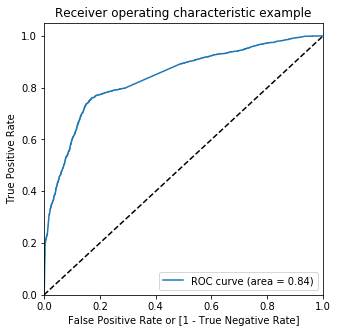

In [110]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

# Area under curve is 0.84 which is very good, that implies model is good.

In [111]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.211015,0,1,1,1,0,0,0,0,0,0,0
1,0,0.256308,0,1,1,1,0,0,0,0,0,0,0
2,0,0.270403,0,1,1,1,0,0,0,0,0,0,0
3,0,0.613346,1,1,1,1,1,1,1,1,0,0,0
4,0,0.211015,0,1,1,1,0,0,0,0,0,0,0


In [112]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.442022  0.992295  0.102949
0.2   0.2  0.646259  0.898216  0.491004
0.3   0.3  0.802257  0.761557  0.827336
0.4   0.4  0.802412  0.711679  0.858321
0.5   0.5  0.790971  0.641119  0.883308
0.6   0.6  0.775201  0.551500  0.913043
0.7   0.7  0.756803  0.448905  0.946527
0.8   0.8  0.735158  0.348337  0.973513
0.9   0.9  0.696042  0.212895  0.993753


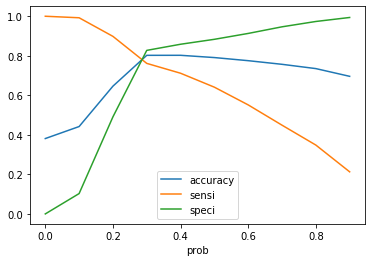

In [113]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [114]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.29 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.211015,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.256308,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.270403,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.613346,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.211015,0,1,1,1,0,0,0,0,0,0,0,0


As seen in graph all 3 lines merge at 0.29.Let's take 0.29 as the optimal-cut off

In [115]:
# Checking the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7983920841063699

In [116]:
#creating the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3283,  719],
       [ 585, 1881]], dtype=int64)

In [117]:
# evaluating the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [118]:
# Calculating Sensitivity

TP/(TP+FN)

0.7627737226277372

In [119]:
# Calculating Specificity

TN/(TN+FP)

0.8203398300849575

Cut off point appears good for data set

# Step 4: Making Predictions on the Test DataSet

In [120]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [121]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Lead Source_google,Do Not Email_Yes,Specialization_Hospitality Management,Specialization_Rural and Agribusiness,Country_France,Country_Hong Kong,Country_India,Country_Qatar,Country_United Arab Emirates,Country_United States,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
4269,0.031873,0.444982,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2376,0.000000,0.000000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
7766,0.019920,0.025968,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
9199,0.000000,0.000000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4359,0.000000,0.000000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [122]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [123]:
# Check X_test_sm

X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Lead Source_google,Do Not Email_Yes,Specialization_Hospitality Management,Specialization_Rural and Agribusiness,...,Country_Hong Kong,Country_India,Country_Qatar,Country_United Arab Emirates,Country_United States,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
4269,1.0,0.031873,0.444982,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2376,1.0,0.000000,0.000000,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
7766,1.0,0.019920,0.025968,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
9199,1.0,0.000000,0.000000,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4359,1.0,0.000000,0.000000,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,1.0,0.059761,0.127641,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2152,1.0,0.000000,0.000000,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
7101,1.0,0.000000,0.000000,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5331,1.0,0.011952,0.707746,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [124]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

In [125]:
y_test_pred[:10]

4269    0.521230
2376    0.850524
7766    0.725631
9199    0.211015
4359    0.850524
9186    0.317017
1631    0.505512
8963    0.177852
8007    0.201476
5324    0.148094
dtype: float64

In [126]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [127]:
# Let's see the head

y_pred_1.head()

,0
4269,0.521230
2376,0.850524
7766,0.725631
9199,0.211015
4359,0.850524


In [128]:

# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [129]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [130]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [131]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.521230
1,1,0.850524
2,1,0.725631
3,0,0.211015
4,1,0.850524


In [132]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Probability'})

In [133]:
# Make predictions on the test set using 0.29 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.29 else 0)

In [134]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Probability,final_predicted
0,1,0.521230,1
1,1,0.850524,1
2,1,0.725631,1
3,0,0.211015,0
4,1,0.850524,1


In [135]:
#calculating Lead Score
y_pred_final['Conversion_Probability']=y_pred_final['Conversion_Probability']*100
y_pred_final.head()

,Converted,Conversion_Probability,final_predicted
0,1,52.123018,1
1,1,85.052402,1
2,1,72.563115,1
3,0,21.101542,0
4,1,85.052402,1


In [136]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7893217893217893

In [137]:
## creating confusion matrix for test data
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1362,  315],
       [ 269,  826]], dtype=int64)

In [138]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("sensitivity = " , TP / float(TP+FN))

# Let us calculate specificity
print("specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("false postive rate = ", FP/ float(TN+FP))

# positive predictive value 
print ("positive predictive value = ",TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value = ",TN / float(TN+ FN))

sensitivity =  0.754337899543379
specificity =  0.8121645796064401
false postive rate =  0.18783542039355994
positive predictive value =  0.7239263803680982
Negative predictive value =  0.8350705088902514


# Precision-Recall View

In [139]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3535,  467],
       [ 885, 1581]], dtype=int64)

# Precision

In [140]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.77197265625

# Recall

In [141]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6411192214111923

# Precision and recall tradeoff

In [142]:
from sklearn.metrics import precision_recall_curve

In [143]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: Predicted, Length: 6468, dtype: int64)

In [144]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

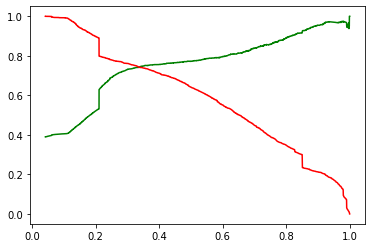

In [145]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()